In [23]:
import numpy as np
import pandas as pd

In [24]:
# load the data
data_audi = pd.read_csv('audi.csv')

# print dataset info
print(data_audi.shape)
data_audi.head()

(10668, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [25]:
# display column names
data_audi.columns

# 'model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
#        'mpg', 'engineSize'

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [26]:
# check missing values
data_audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [27]:
# check if there are any duplicates
data_audi.duplicated().sum()

np.int64(103)

In [28]:
# drop duplicates
data_audi = data_audi.drop_duplicates()

In [29]:
# check if any columns have zero values
(data_audi == 0).sum()

model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax             534
mpg               0
engineSize       52
dtype: int64

In [30]:
# remove rows with engineSize = 0
data_audi = data_audi[data_audi['engineSize'] != 0]

<Axes: xlabel='count', ylabel='transmission'>

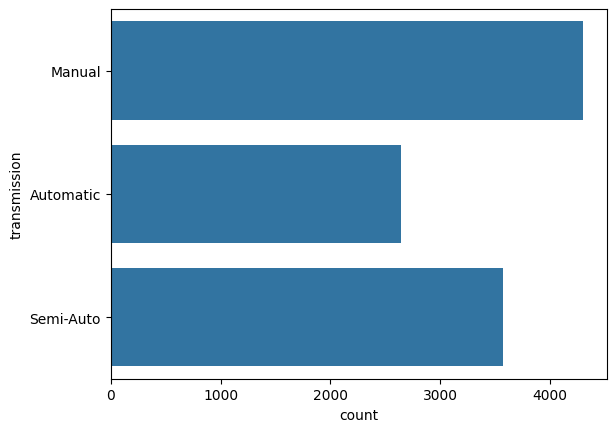

In [31]:
# plot categorical feature distributions
import seaborn as sns

sns.countplot(data_audi['transmission'])

<Axes: xlabel='count', ylabel='fuelType'>

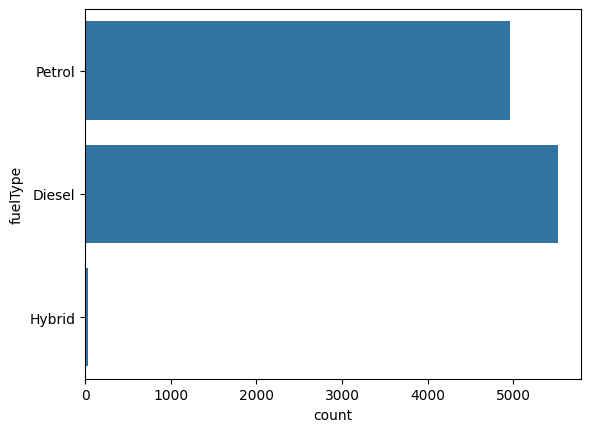

In [32]:
sns.countplot(data_audi['fuelType'])

<Axes: xlabel='count', ylabel='model'>

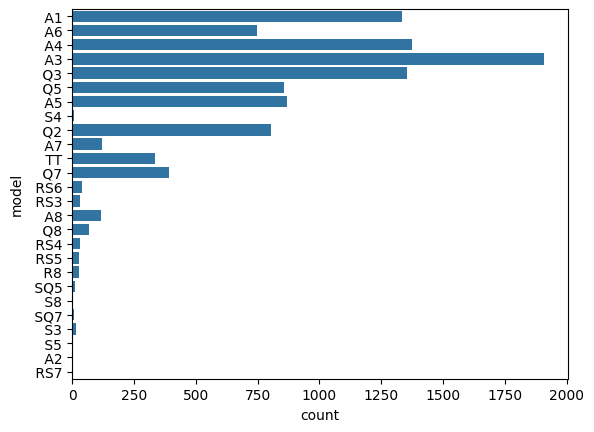

In [33]:
sns.countplot(data_audi['model'])

<Axes: xlabel='count', ylabel='year'>

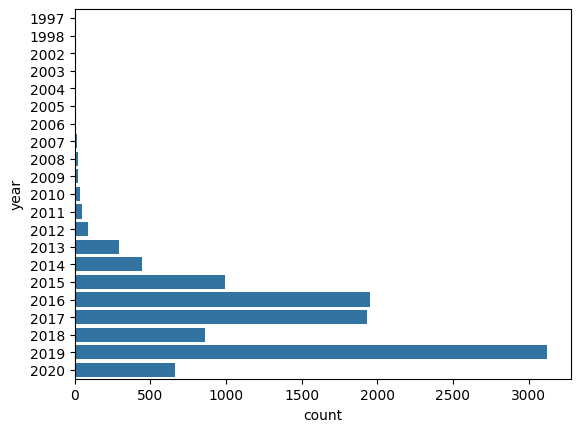

In [34]:
sns.countplot(y = data_audi["year"])

In [35]:
# convert 'year' to 'age'
base_year = data_audi['year'].max()
data_audi['carAge'] = base_year - data_audi['year']

# drop 'year' column
data_audi = data_audi.drop(columns=['year'])

In [36]:
# use label encoding for 'model', 'transmission' and 'fuelType'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_audi['transmission'] = label_encoder.fit_transform(data_audi['transmission'])
data_audi['fuelType'] = label_encoder.fit_transform(data_audi['fuelType'])
data_audi['model'] = label_encoder.fit_transform(data_audi['model'])

In [37]:
# log transform 'price' value
data_audi['price'] = np.log(data_audi['price'])

In [38]:
print(data_audi.shape)

data_audi.head()

(10513, 9)


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,carAge
0,0,9.433484,1,15735,2,150,55.4,1.4,3
1,5,9.711116,0,36203,0,20,64.2,2.0,4
2,0,9.305651,1,29946,2,30,55.4,1.4,4
3,3,9.729134,0,25952,0,145,67.3,2.0,3
4,2,9.758462,1,1998,2,145,49.6,1.0,1


In [39]:
# save the processed data
data_audi.to_csv('processed_audi.csv', index=False)

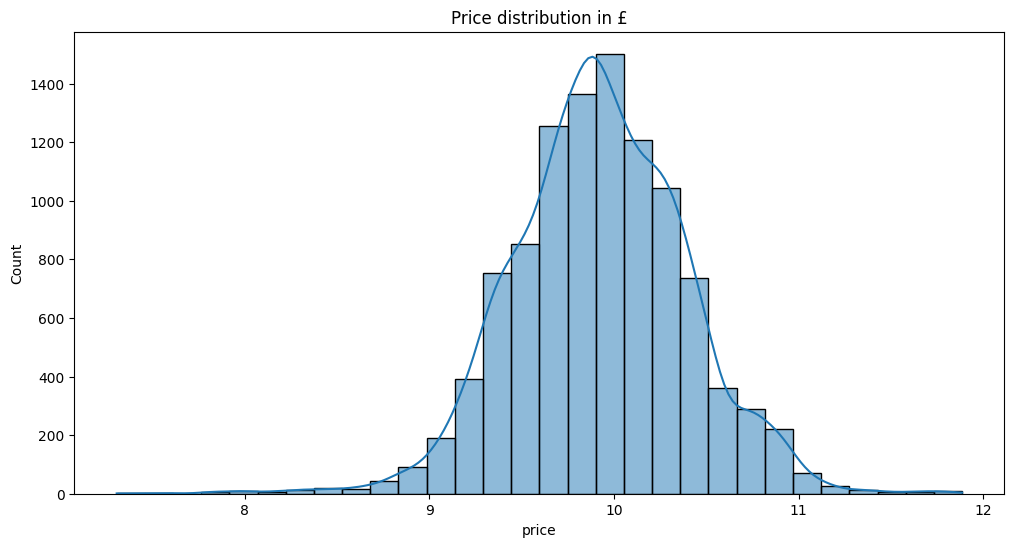

In [40]:
import matplotlib.pyplot as plt

# check the distribution of the target variable price in £
plt.figure(figsize=(12, 6))
sns.histplot(data_audi['price'], bins=30, kde=True)
plt.title('Price distribution in £')
plt.show()

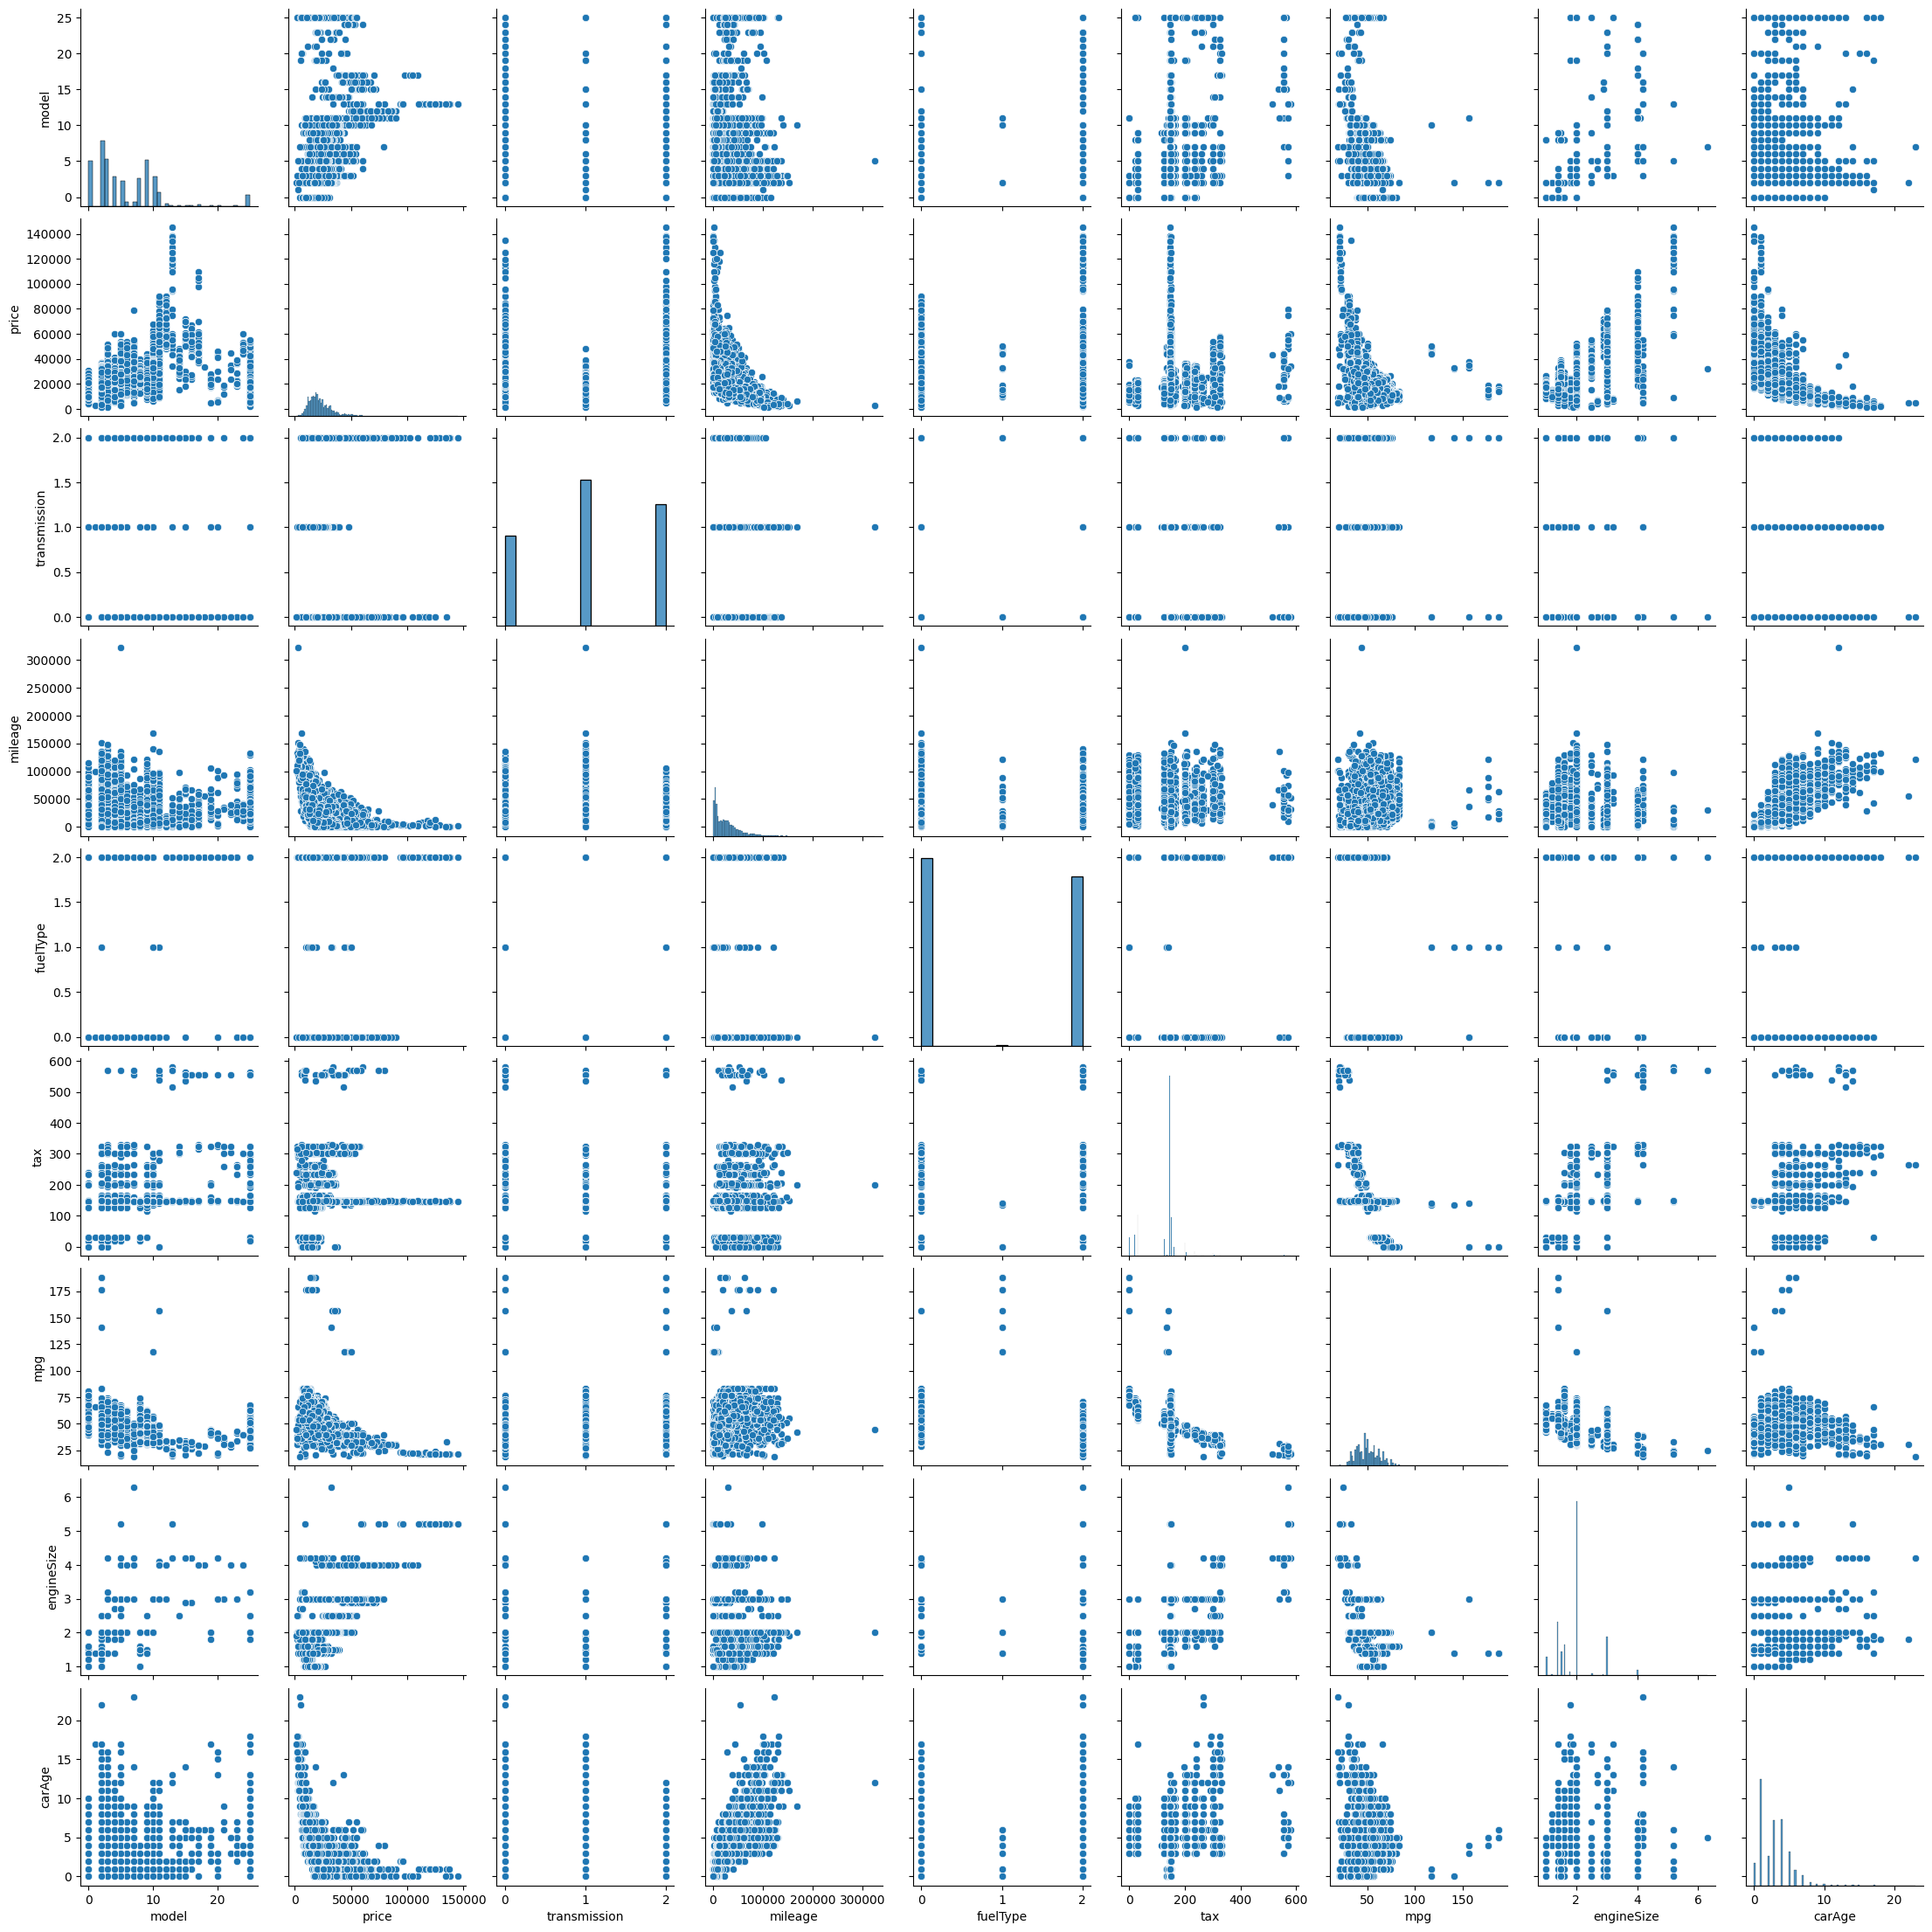

In [21]:
# dispaly the pairplot of the dataset
sns.pairplot(data_audi)

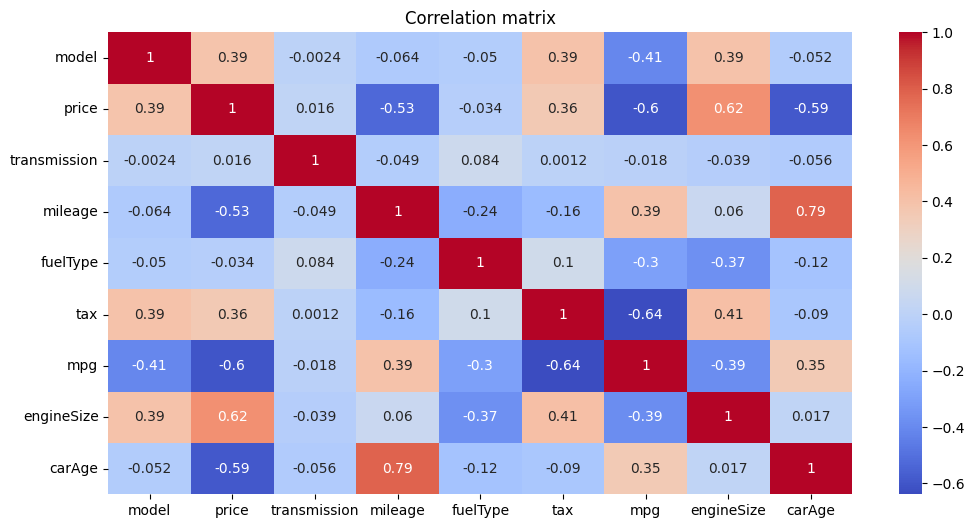

In [22]:
# check the correlation between the features
plt.figure(figsize=(12, 6))
sns.heatmap(data_audi.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()